In [ ]:
import pandas as pd
df_income = pd.read_csv('kaggle_income.csv', encoding= 'ISO-8859-1')
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32526 entries, 0 to 32525
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          32526 non-null  int64  
 1   State_Code  32526 non-null  int64  
 2   State_Name  32526 non-null  object 
 3   State_ab    32526 non-null  object 
 4   County      32526 non-null  object 
 5   City        32526 non-null  object 
 6   Place       32526 non-null  object 
 7   Type        32526 non-null  object 
 8   Primary     32526 non-null  object 
 9   Zip_Code    32526 non-null  int64  
 10  Area_Code   32526 non-null  object 
 11  ALand       32526 non-null  int64  
 12  AWater      32526 non-null  int64  
 13  Lat         32526 non-null  float64
 14  Lon         32526 non-null  float64
 15  Mean        32526 non-null  int64  
 16  Median      32526 non-null  int64  
 17  Stdev       32526 non-null  int64  
 18  sum_w       32526 non-null  float64
dtypes: float64(3), int64(8), 

In [ ]:
from sklearn.model_selection import train_test_split
df_income['Area_Code_Num'] = pd.to_numeric(df_income['Area_Code'], errors='coerce')
df_income['Area_Code_Num'].fillna(0,inplace=True)
dummies_Type= pd.get_dummies(df_income['Type'], prefix='Type') 
dummies_Primary = pd.get_dummies(df_income['Primary'], prefix='Primary')
y= df_income[['Mean']]
#df_income_new=pd.concat([df_income, dummies_Type, dummies_Primary], axis=1)
df_income.drop(['id','State_Name', 'State_ab','County', 'City','Place','Type','Primary', 'Median','Stdev','Area_Code','Mean'], axis=1, inplace=True)
X = df_income

X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.1, random_state=3)
X_train.head(10)

,State_Code,Zip_Code,ALand,AWater,Lat,Lon,sum_w,Area_Code_Num
24107,41,97603,5376012,0,42.195721,-121.714444,1422.206867,541.0
22468,39,44052,1117351,258847,41.460555,-82.194496,402.584133,440.0
26081,45,29936,655791460,3616013,32.548390,-81.093104,552.951132,843.0
28204,48,76180,2818034,0,32.853840,-97.202665,452.910377,817.0
23382,39,43701,17825561,683652,39.998870,-81.992374,335.547967,740.0
15756,27,55378,10702693,292286,44.731093,-93.352225,158.615346,952.0
25011,42,15210,849780,0,40.384700,-79.992046,182.429223,412.0
1430,5,72201,2788581,394309,34.759842,-92.270569,199.394982,501.0
10396,18,46516,4202645,703582,41.690062,-85.949999,1621.516750,574.0
22888,39,44137,3354889,0,41.414279,-81.516590,1209.385083,216.0


In [ ]:
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler
mapper = DataFrameMapper([(X_train.columns, StandardScaler())])
scaled_features = mapper.fit_transform(X_train.copy())
X_train_scaled= pd.DataFrame(scaled_features, index=X_train.index, columns=X_train.columns)
scaled_features_test = mapper.fit_transform(X_test.copy())
X_test_scaled= pd.DataFrame(scaled_features_test, index=X_test.index, columns=X_test.columns)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred_linear = model.predict(X_test_scaled)
print('Explained variance score: %2f' % explained_variance_score(y_test,y_pred_linear))
print('Mean squared error: %2f' % mean_squared_error(y_test,y_pred_linear))
print('Variance score: %2f' % r2_score(y_test,y_pred_linear))



Explained variance score: 0.038219
Mean squared error: 892501858.534230
Variance score: 0.038195


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
model = RandomForestRegressor(random_state=0, n_jobs=-1)
model.fit(X_train, y_train.values.ravel())
y_pred_rf = model.predict(X_test)
print('Explained variance score: %2f' % explained_variance_score(y_test,y_pred_rf))
print('Mean squared error: %2f' % mean_squared_error(y_test,y_pred_rf))
print('Variance score: %2f' % r2_score(y_test,y_pred_rf))



Explained variance score: 0.529226
Mean squared error: 437160706.779049
Variance score: 0.528894


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=18)
model.fit(X_train, y_train)
y_pred_knn = model.predict(X_test)
print('Explained variance score: %2f' % explained_variance_score(y_test,y_pred_knn))
print('Mean squared error: %2f' % mean_squared_error(y_test,y_pred_knn))
print('Variance score: %2f' % r2_score(y_test,y_pred_knn))



Explained variance score: 0.034953
Mean squared error: 895534414.536968
Variance score: 0.034927


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


model = GaussianNB()
model.fit(X_train_scaled, y_train)
y_pred_nb = model.predict(X_test_scaled)
print('Explained variance score: %2f' % explained_variance_score(y_test,y_pred_nb))
print('Mean squared error: %2f' % mean_squared_error(y_test,y_pred_nb))
print('Variance score: %2f' % r2_score(y_test,y_pred_nb))


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Explained variance score: -0.106392
Mean squared error: 1102887040.074393
Variance score: -0.188527


In [ ]:
from sklearn import svm

#Create a svm Classifier
mode = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svm = model.predict(X_test)
print('Explained variance score: %2f' % explained_variance_score(y_test,y_pred_svm))
print('Mean squared error: %2f' % mean_squared_error(y_test,y_pred_svm))
print('Variance score: %2f' % r2_score(y_test,y_pred_svm))


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Explained variance score: -0.642465
Mean squared error: 1524120048.178912
Variance score: -0.642469


Text(0, 0.5, 'r2_score')

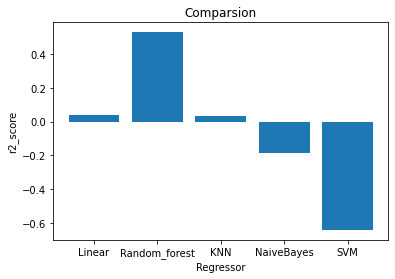

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

y= np.array([r2_score(y_test,y_pred_linear),r2_score(y_test,y_pred_rf),r2_score(y_test,y_pred_knn),r2_score(y_test,y_pred_nb),r2_score(y_test,y_pred_svm)])
x=['Linear', 'Random_forest', 'KNN','NaiveBayes','SVM']
plt.bar(x,y)
plt.title('Comparsion')
plt.xlabel('Regressor')
plt.ylabel('r2_score')